In [31]:
import os
import sys
from dotenv import load_dotenv

notebook_path = os.getcwd()

# One level up from the notebook
PROJECT_ROOT = os.path.abspath(os.path.join(notebook_path, "../"))

DATA_ROOT = os.path.join(PROJECT_ROOT, "data")

sys.path.insert(1, PROJECT_ROOT)
load_dotenv()

True

In [32]:
import glob

import databento as db
import pandas as pd
import numpy as np
import datetime

import plotly.graph_objects as go

Download from Databento (Magnificent 7, OHLCV-1min)

Remark: FB was changed to META on June 9, 2022.

In [127]:
client = db.Historical(os.getenv("DATABENTO_API"))
symbols = ["FB"]
start_date = datetime.datetime(2018, 1, 1, 0, 0, 0)
end_date = datetime.datetime(2025, 1, 1, 0, 0, 0)
min_allowed_date = datetime.datetime(2018, 5, 1, 0, 0, 0)

for symbol in symbols:
    current_date = start_date
    df = pd.DataFrame()

    while current_date < end_date:
        next_date = current_date + pd.DateOffset(years=1)
        print(current_date, next_date)

        data = client.timeseries.get_range(
            dataset="XNAS.ITCH",
            symbols=symbol,
            schema="ohlcv-1m",
            start=max(current_date, min_allowed_date).strftime("%Y-%m-%dT%H:%M:%S"),
            end=next_date.strftime("%Y-%m-%dT%H:%M:%S"),
        )

        tmp_df = data.to_df()
        current_date = next_date
        if len(tmp_df) == 0: continue
        tmp_df.to_csv(f"../data/databento/{symbol}_ohlcv-1m_{tmp_df.index.min().strftime('%Y-%m-%d')}.csv")

2018-01-01 00:00:00 2019-01-01 00:00:00
2019-01-01 00:00:00 2020-01-01 00:00:00
2020-01-01 00:00:00 2021-01-01 00:00:00
2021-01-01 00:00:00 2022-01-01 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\1460902285.py:15: BentoWarning:

The streaming request contained one or more days which have reduced quality: 2021-07-07 (degraded), 2021-10-26 (degraded). See: https://databento.com/docs/api-reference-historical/metadata/metadata-get-dataset-condition



2022-01-01 00:00:00 2023-01-01 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\1460902285.py:15: BentoWarning:

The streaming request contained one or more days which have reduced quality: 2022-09-19 (degraded). See: https://databento.com/docs/api-reference-historical/metadata/metadata-get-dataset-condition



2023-01-01 00:00:00 2024-01-01 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\1460902285.py:15: BentoWarning:

No data found for the request you submitted.

C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\1460902285.py:15: BentoWarning:

The streaming request had one or more symbols which did not resolve: FB.



2024-01-01 00:00:00 2025-01-01 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\1460902285.py:15: BentoWarning:

No data found for the request you submitted.

C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\1460902285.py:15: BentoWarning:

The streaming request had one or more symbols which did not resolve: FB.



In [59]:
client = db.Historical(os.getenv("DATABENTO_API"))
symbols = ["SPY", "AAPL", "MSFT", "AMZN", "GOOG", "META", "NVDA", "TSLA"]
start_date = datetime.datetime(2018, 1, 1, 0, 0, 0)
end_date = datetime.datetime(2025, 1, 1, 0, 0, 0)
min_allowed_date = datetime.datetime(2018, 5, 1, 0, 0, 0)

for symbol in symbols:
    current_date = start_date
    df = pd.DataFrame()

    while current_date < end_date:
        next_date = current_date + pd.DateOffset(years=1)
        print(current_date, next_date)

        data = client.timeseries.get_range(
            dataset="XNAS.ITCH",
            symbols=symbol,
            schema="ohlcv-1m",
            start=max(current_date, min_allowed_date).strftime("%Y-%m-%dT%H:%M:%S"),
            end=next_date.strftime("%Y-%m-%dT%H:%M:%S"),
        )

        tmp_df = data.to_df()
        current_date = next_date
        if len(tmp_df) == 0: continue
        tmp_df.to_csv(f"../data/databento/{symbol}_ohlcv-1m_{tmp_df.index.min().strftime('%Y-%m-%d')}.csv")

2018-01-01 00:00:00 2019-01-01 00:00:00
2019-01-01 00:00:00 2020-01-01 00:00:00
2020-01-01 00:00:00 2021-01-01 00:00:00
2021-01-01 00:00:00 2022-01-01 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\3738543734.py:16: BentoWarning: The streaming request contained one or more days which have reduced quality: 2021-07-07 (degraded), 2021-10-26 (degraded). See: https://databento.com/docs/api-reference-historical/metadata/metadata-get-dataset-condition
  data = client.timeseries.get_range(


2022-01-01 00:00:00 2023-01-01 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\3738543734.py:16: BentoWarning: The streaming request contained one or more days which have reduced quality: 2022-09-19 (degraded). See: https://databento.com/docs/api-reference-historical/metadata/metadata-get-dataset-condition
  data = client.timeseries.get_range(


2023-01-01 00:00:00 2024-01-01 00:00:00
2024-01-01 00:00:00 2025-01-01 00:00:00


# Read

Aggregate 1 min data into whatever time frame.(sample operation)

In [3]:
symbol = "AAPL"
date   = "2019-01-02"

df = pd.read_csv(os.path.join(DATA_ROOT, "databento", f"{symbol}_ohlcv-1m_{date}.csv"), index_col=0)
df.index = pd.to_datetime(df.index)

In [7]:
timeframe = "1h"
resampled_df = df.resample(timeframe).agg(
                    {
                        'open': 'first',
                        'high': 'max',
                        'low': 'min',
                        'close': 'last',
                        'volume': 'sum',
                    }
                )

<Axes: xlabel='ts_event'>

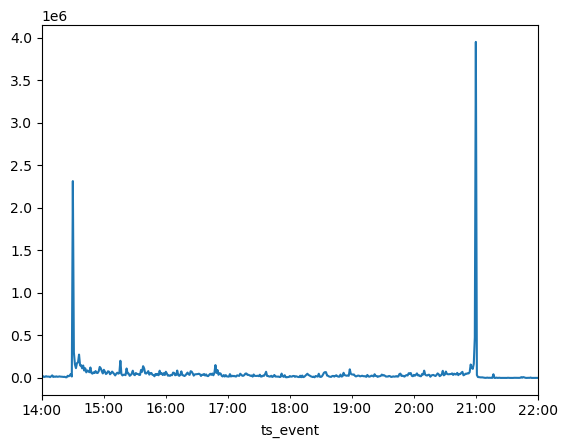

In [24]:
df.loc['2019-01-03 14:00': '2019-01-03 22:00', 'volume'].plot()

combine multiple symbols

In [128]:
def read_df_with_prefix(directory, prefix):
    tmp = []

    for filename in glob.glob(os.path.join(directory, f"{prefix}*")):
        tmp.append(pd.read_csv(filename, index_col=0))

    return pd.concat(tmp, axis=0)

# # Example usage:
# symbol = "AAPL"

# directory = os.path.join(DATA_ROOT, "databento")
# prefix = f"{symbol}_ohlcv-1m_"

# df = read_df_with_prefix(directory, prefix)
# df.index = pd.to_datetime(df.index)

In [195]:
symbols = ["SPY", "AAPL", "MSFT", "AMZN", "GOOG", "NVDA", "TSLA"] # dropped META because of FB-META change.
tmp = []

for symbol in symbols:
    directory = os.path.join(DATA_ROOT, "databento")
    prefix = f"{symbol}_ohlcv-1m_"

    tmpdf = read_df_with_prefix(directory, prefix)
    tmpdf.index = pd.to_datetime(tmpdf.index)
    tmpdf = tmpdf[['open','high','low','close','volume']]
    tmpdf.columns = [f"{symbol}_{x}" for x in tmpdf.columns]
    tmp.append(tmpdf)

df = pd.concat(tmp, axis=1)

In [199]:
# deal with META separately...
tmp = []
for fname in glob.glob(os.path.join(directory, "FB_ohlcv-1m_*")):
    tmpdf = pd.read_csv(fname, index_col=0)
    tmpdf.index = pd.to_datetime(tmpdf.index)
    tmpdf = tmpdf[['open','high','low','close','volume']]
    tmp.append(tmpdf)

fb_df = pd.concat(tmp, axis=0)
fb_df = fb_df.loc[:'2022-06-09']

tmp = []
for fname in glob.glob(os.path.join(directory, "META_ohlcv-1m_*")):
    tmpdf = pd.read_csv(fname, index_col=0)
    tmpdf.index = pd.to_datetime(tmpdf.index)
    tmpdf = tmpdf[['open','high','low','close','volume']]
    tmp.append(tmpdf)

meta_df = pd.concat(tmp, axis=0)
meta_df = meta_df.loc['2022-06-09':]

meta_df = pd.concat([fb_df, meta_df], axis=0)
meta_df.columns = [f"META_{x}" for x in meta_df.columns]

In [200]:
# merge back
df = pd.concat([df, meta_df], axis=1)

<Axes: xlabel='ts_event'>

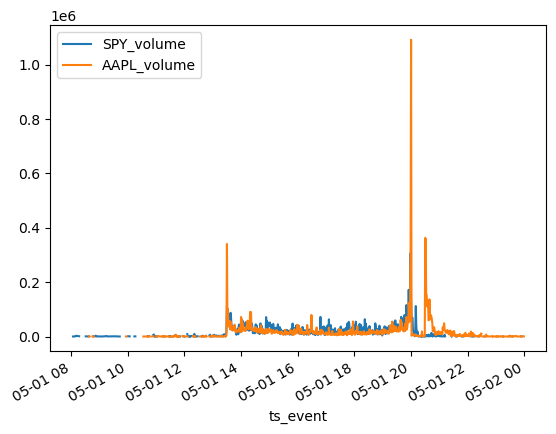

In [144]:
df.loc['2018-05-01':'2018-05-01', ['SPY_volume', 'AAPL_volume']].plot()

In [252]:
start_time = '14:30'
end_time = '21:00'

methods = {
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
}

agg_methods = {}
for symbol in (symbols+['META']):
    for col, method in methods.items():
        agg_methods[f"{symbol}_{col}"] = method

timeframe = "1d"
tmp = df.resample("1d").agg(agg_methods)
tmp = tmp.dropna() # non-trading days are na
trading_days = tmp.index

resampled_df = df.between_time(start_time, end_time).resample(timeframe).agg(agg_methods)
# aggregation creates non-trading dates. line below eliminates them.
resampled_df = resampled_df.loc[resampled_df.index.strftime("%Y-%m-%d").isin(trading_days.strftime("%Y-%m-%d"))]

In [273]:
resampled_df

,SPY_open,SPY_high,SPY_low,SPY_close,SPY_volume,AAPL_open,AAPL_high,AAPL_low,AAPL_close,AAPL_volume,...,TSLA_open,TSLA_high,TSLA_low,TSLA_close,TSLA_volume,META_open,META_high,META_low,META_close,META_volume
ts_event,,,,,,,,,,,,,,,,,,,,,
2018-05-01 00:00:00+00:00,263.520,265.52,262.11,265.15,9612444.0,167.755,178.00,166.50,175.06,10010395.0,...,297.42,301.02,293.40,300.82,1242352.0,172.42,174.78,170.23,174.40,5008549.0
2018-05-02 00:00:00+00:00,264.270,265.68,262.36,262.45,10234741.0,176.140,177.75,175.22,176.42,10087147.0,...,299.81,311.64,298.00,301.85,1965089.0,176.38,178.09,175.75,175.97,6653583.0
2018-05-03 00:00:00+00:00,260.475,263.36,259.05,262.95,19136331.0,175.780,177.50,174.46,177.04,7665886.0,...,282.48,286.00,275.25,283.95,2923014.0,173.89,175.73,172.12,174.22,5753497.0
2018-05-04 00:00:00+00:00,263.760,266.78,263.63,266.18,10718099.0,182.970,184.25,182.52,183.90,9711912.0,...,288.69,296.79,285.29,293.81,1749153.0,176.14,176.98,175.15,176.72,3808709.0
2018-05-07 00:00:00+00:00,267.410,268.02,266.11,266.75,7173030.0,187.370,187.66,184.75,185.02,6562690.0,...,299.63,305.95,299.21,302.30,1827504.0,179.03,179.35,177.17,177.86,3960865.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24 00:00:00+00:00,596.060,602.20,595.47,601.06,3587239.0,255.480,258.36,255.29,257.84,6938715.0,...,435.83,466.49,435.14,464.90,12896896.0,602.21,608.22,599.25,607.75,1560187.0
2024-12-26 00:00:00+00:00,599.460,602.48,598.09,601.24,3357937.0,258.190,260.09,257.63,259.10,9028441.0,...,465.02,465.27,451.02,454.03,12195168.0,605.85,606.41,598.94,603.39,2313856.0
2024-12-27 00:00:00+00:00,597.470,597.76,590.77,595.20,6896726.0,257.840,258.70,253.06,255.85,17585064.0,...,449.27,449.89,426.49,431.81,18079141.0,599.40,601.77,589.80,599.98,2784967.0


In [354]:
tmp = []
for symbol in (symbols+['META']):
    tmpdf = pd.read_csv(os.path.join(DATA_ROOT, f"{symbol}.O.csv"), index_col=0)
    tmpdf.columns = [f"{symbol}_{x}" for x in tmpdf.columns]
    tmpdf.index = pd.to_datetime(tmpdf.index, utc=True)
    tmp.append(tmpdf)

yf_df = pd.concat(tmp, axis=1)

calculate adjust factor for adjusted factor with yfinance data...

In [355]:
yf_df = yf_df.loc['2018-05-01':'2024-12-31',["SPY_ADJ_CLOSE","AAPL_CLOSE","MSFT_CLOSE",'AMZN_CLOSE','GOOG_CLOSE','NVDA_CLOSE','TSLA_CLOSE','META_CLOSE']]
yf_df = yf_df.rename(columns={"SPY_ADJ_CLOSE": "SPY_CLOSE"})
yf_df = yf_df.ffill()

In [356]:
yf_df

,SPY_CLOSE,AAPL_CLOSE,MSFT_CLOSE,AMZN_CLOSE,GOOG_CLOSE,NVDA_CLOSE,TSLA_CLOSE,META_CLOSE
2018-05-01 00:00:00+00:00,237.557266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-02 00:00:00+00:00,235.961380,41.707637,87.044921,78.48400,51.035621,5.600075,20.076669,175.399982
2018-05-03 00:00:00+00:00,235.441498,41.783225,87.566204,78.60375,51.002739,5.765372,18.963336,173.357783
2018-05-04 00:00:00+00:00,238.489563,43.422524,88.580844,79.04750,52.222855,5.915575,19.606002,175.937927
2018-05-07 00:00:00+00:00,239.296494,43.736683,89.567558,80.00700,52.550677,6.153624,20.184669,177.292752
...,...,...,...,...,...,...,...,...
2024-12-25 00:00:00+00:00,601.299988,258.200000,439.330000,229.05000,197.570000,140.220000,462.280000,607.750000
2024-12-26 00:00:00+00:00,601.340027,259.020000,438.110000,227.05000,197.100000,139.930000,454.130000,603.350000
2024-12-27 00:00:00+00:00,595.010010,255.590000,430.530000,223.75000,194.040000,137.010000,431.660000,599.810000
2024-12-30 00:00:00+00:00,588.219971,252.200000,424.830000,221.30000,192.690000,137.490000,417.410000,591.240000


In [357]:
resampled_df[[f"{x}_close" for x in (symbols+['META'])]]

,SPY_close,AAPL_close,MSFT_close,AMZN_close,GOOG_close,NVDA_close,TSLA_close,META_close
ts_event,,,,,,,,
2018-05-01 00:00:00+00:00,265.15,175.06,95.35,1585.15,1037.81,228.30,300.82,174.40
2018-05-02 00:00:00+00:00,262.45,176.42,93.11,1568.00,1023.00,225.56,301.85,175.97
2018-05-03 00:00:00+00:00,262.95,177.04,94.30,1573.00,1026.00,233.37,283.95,174.22
2018-05-04 00:00:00+00:00,266.18,183.90,95.32,1580.50,1047.77,239.20,293.81,176.72
2018-05-07 00:00:00+00:00,266.75,185.02,96.30,1599.01,1054.79,248.97,302.30,177.86
...,...,...,...,...,...,...,...,...
2024-12-24 00:00:00+00:00,601.06,257.84,439.11,228.80,197.51,139.61,464.90,607.75
2024-12-26 00:00:00+00:00,601.24,259.10,438.30,227.02,197.14,139.78,454.03,603.39
2024-12-27 00:00:00+00:00,595.20,255.85,430.50,224.16,194.44,137.10,431.81,599.98


<Axes: xlabel='ts_event'>

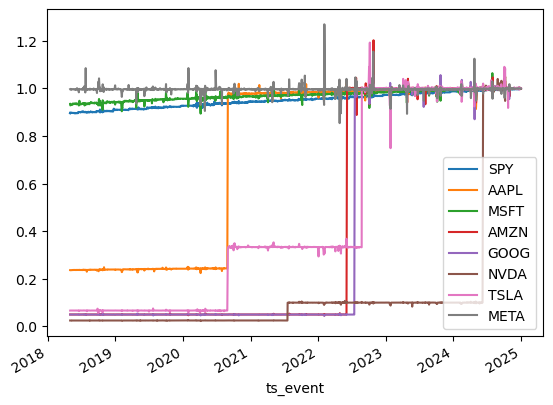

In [358]:
factor_df = pd.DataFrame(index=resampled_df.index)

for symbol in (symbols+['META']):
    factor_df[symbol] = yf_df.loc['2018-05-01':'2024-12-31',f"{symbol}_CLOSE"] / resampled_df[f'{symbol}_close']

factor_df = factor_df.ffill()
# factor_df.to_csv(os.path.join(DATA_ROOT, "offset_factor", "offset_factor.csv"))
factor_df.plot()

(one) multiple periods of beta, one symbol.

In [361]:
import statsmodels.formula.api as sm

TARGET = "TSLA"

# Calculate daily returns for AAPL and SPY
resampled_df[f"{TARGET}_returns"] = (resampled_df[f"{TARGET}_close"] * factor_df[TARGET]) / (resampled_df[f"{TARGET}_close"].shift(1) * factor_df[TARGET].shift(1)) - 1
resampled_df["SPY_returns"] = (resampled_df["SPY_close"] * factor_df['SPY']) / (resampled_df["SPY_close"].shift(1) * factor_df['SPY'].shift(1)) - 1

# Define the rolling window sizes
window_sizes = [20, 60, 120]

# Create an empty dictionary to store the betas for each window size
betas = {window_size: [] for window_size in window_sizes}

# Iterate over the DataFrame with rolling windows
for window_size in window_sizes:
    for i in range(window_size, len(resampled_df)):
        # Extract the rolling window data
        rolling_resampled_df = resampled_df.iloc[i - window_size: i]

        # Perform the regression
        result = sm.ols(f"SPY_returns ~ {TARGET}_returns", data=rolling_resampled_df).fit()

        # Get the beta coefficient
        beta = result.params[f"{TARGET}_returns"]

        # Append the beta to the corresponding list in the dictionary
        betas[window_size].append(beta)
    
    betas[window_size] = [np.nan] * (window_size - min(window_sizes)) + betas[window_size]

# Create a new DataFrame with the betas for each window size
beta_resampled_df = pd.DataFrame({
        f"beta_{window_size}": betas[window_size]
        for window_size in window_sizes
    },
    index=resampled_df.index[min(window_sizes):],  # Adjust index for the largest window
)

In [362]:
# Create a Plotly figure
fig = go.Figure()

# Add traces for each beta column
for col in beta_resampled_df.columns:
    fig.add_trace(
        go.Scatter(
            x=beta_resampled_df.index,
            y=beta_resampled_df[col],
            mode="lines",
            name=col,
        )
    )

fig.update_layout(
    title=f"{TARGET} Beta wrt SPY Coefficients Over Time",
    xaxis_title="Date",
    yaxis_title="Beta",
)

# Show the plot
fig.show()

c:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [363]:
resampled_df["SPY_returns"] = (resampled_df["SPY_close"] * factor_df['SPY']) / (resampled_df["SPY_close"].shift(1) * factor_df['SPY'].shift(1)) - 1

betas = {target: [] for target in (symbols + ['META'])}

for target in (symbols + ['META']):
    resampled_df[f"{target}_returns"] = (resampled_df[f"{target}_close"] * factor_df[target]) / (resampled_df[f"{target}_close"].shift(1) * factor_df[target].shift(1)) - 1

    # Perform the regression
    # result = sm.ols(f"SPY_returns ~ {target}_returns", data=resampled_df).fit()
    result = sm.ols(f"{target}_returns ~ SPY_returns", data=resampled_df).fit()

    # Get the beta coefficient
    # beta = result.params[f"{target}_returns"]
    beta = result.params["SPY_returns"]

    # Append the beta to the corresponding list in the dictionary
    betas[target].append(beta)

In [364]:
betas

{'SPY': [1.0000000000000013],
 'AAPL': [1.1203459745376707],
 'MSFT': [1.1179528338624394],
 'AMZN': [1.078537442007364],
 'GOOG': [1.062847891176193],
 'NVDA': [1.680812930449628],
 'TSLA': [1.4389418263875058],
 'META': [1.1847612120804083]}

In [365]:
resampled_df["SPY_returns"] = (resampled_df["SPY_close"] * factor_df['SPY']) / (resampled_df["SPY_close"].shift(1) * factor_df['SPY'].shift(1)) - 1
betas = {target: [] for target in (symbols + ['META'])}

WINDOW_SIZE = 60

for target in (symbols + ['META']):
    resampled_df[f"{target}_returns"] = (resampled_df[f"{target}_close"] * factor_df[target]) / (resampled_df[f"{target}_close"].shift(1) * factor_df[target].shift(1)) - 1

    # Iterate over the DataFrame with rolling windows
    for i in range(WINDOW_SIZE, len(resampled_df)):
        # Extract the rolling window data
        rolling_resampled_df = resampled_df.iloc[i - WINDOW_SIZE: i]

        # Perform the regression
        result = sm.ols(f"{target}_returns ~ SPY_returns", data=rolling_resampled_df).fit()

        # Get the beta coefficient
        # beta = result.params[f"{target}_returns"]
        beta = result.params["SPY_returns"]

        # Append the beta to the corresponding list in the dictionary
        betas[target].append(beta)

<Axes: >

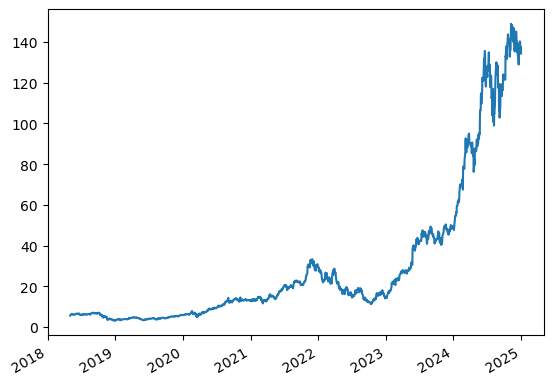

In [366]:
yf_df['NVDA_CLOSE'].plot()

In [367]:
yf_df.loc['2024-06':'2024-06', 'NVDA_CLOSE']

2024-06-03 00:00:00+00:00    114.972797
2024-06-04 00:00:00+00:00    116.409457
2024-06-05 00:00:00+00:00    122.411037
2024-06-06 00:00:00+00:00    120.969378
2024-06-07 00:00:00+00:00    120.859404
2024-06-10 00:00:00+00:00    120.859404
2024-06-11 00:00:00+00:00    120.891331
2024-06-12 00:00:00+00:00    125.180669
2024-06-13 00:00:00+00:00    129.589988
2024-06-14 00:00:00+00:00    131.859637
2024-06-17 00:00:00+00:00    130.959776
2024-06-18 00:00:00+00:00    135.559066
2024-06-19 00:00:00+00:00    135.559066
2024-06-20 00:00:00+00:00    130.759807
2024-06-21 00:00:00+00:00    126.550457
2024-06-24 00:00:00+00:00    118.091763
2024-06-25 00:00:00+00:00    126.070531
2024-06-26 00:00:00+00:00    126.380483
2024-06-27 00:00:00+00:00    123.970856
2024-06-28 00:00:00+00:00    123.520925
Name: NVDA_CLOSE, dtype: float64

In [368]:
yf_df.loc['2024-06':'2024-06', 'NVDA_CLOSE'] / resampled_df.loc['2024-06':'2024-06', 'NVDA_close']

2024-06-03 00:00:00+00:00    0.099518
2024-06-04 00:00:00+00:00    0.100146
2024-06-05 00:00:00+00:00    0.099408
2024-06-06 00:00:00+00:00    0.100265
2024-06-07 00:00:00+00:00    0.100079
2024-06-10 00:00:00+00:00    0.992522
2024-06-11 00:00:00+00:00    1.001005
2024-06-12 00:00:00+00:00    0.990353
2024-06-13 00:00:00+00:00    0.999768
2024-06-14 00:00:00+00:00    0.999088
2024-06-17 00:00:00+00:00    0.999312
2024-06-18 00:00:00+00:00    0.995002
2024-06-19 00:00:00+00:00         NaN
2024-06-20 00:00:00+00:00    1.000534
2024-06-21 00:00:00+00:00    0.996460
2024-06-24 00:00:00+00:00    1.010800
2024-06-25 00:00:00+00:00    0.992056
2024-06-26 00:00:00+00:00    1.011287
2024-06-27 00:00:00+00:00    0.999926
2024-06-28 00:00:00+00:00    0.997907
dtype: float64

In [369]:
resampled_df.loc['2024-06':'2024-06', 'NVDA_close']

ts_event
2024-06-03 00:00:00+00:00    1155.30
2024-06-04 00:00:00+00:00    1162.40
2024-06-05 00:00:00+00:00    1231.40
2024-06-06 00:00:00+00:00    1206.50
2024-06-07 00:00:00+00:00    1207.64
2024-06-10 00:00:00+00:00     121.77
2024-06-11 00:00:00+00:00     120.77
2024-06-12 00:00:00+00:00     126.40
2024-06-13 00:00:00+00:00     129.62
2024-06-14 00:00:00+00:00     131.98
2024-06-17 00:00:00+00:00     131.05
2024-06-18 00:00:00+00:00     136.24
2024-06-20 00:00:00+00:00     130.69
2024-06-21 00:00:00+00:00     127.00
2024-06-24 00:00:00+00:00     116.83
2024-06-25 00:00:00+00:00     127.08
2024-06-26 00:00:00+00:00     124.97
2024-06-27 00:00:00+00:00     123.98
2024-06-28 00:00:00+00:00     123.78
Name: NVDA_close, dtype: float64

<Axes: xlabel='ts_event'>

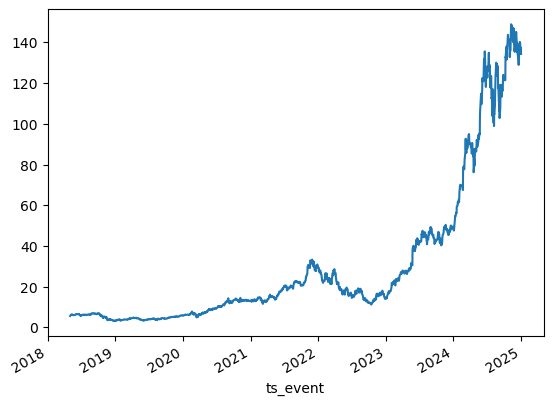

In [372]:
(resampled_df[f"NVDA_close"] * factor_df["NVDA"]).plot()

In [373]:
# Create a new DataFrame with the betas for each window size
beta_df = pd.DataFrame({
        f"beta_{target}": betas[target]
        for target in (symbols + ['META'])
    },
    index=resampled_df.index[WINDOW_SIZE:],  # Adjust index for the largest window
)

# Create a Plotly figure
fig = go.Figure()

# Add traces for each beta column
for col in beta_df.columns:
    fig.add_trace(
        go.Scatter(
            x=beta_df.index,
            y=beta_df[col],
            mode="lines",
            name=col,
        )
    )

fig.update_layout(
    title=f"Beta wrt SPY Coefficients Over Time",
    xaxis_title="Date",
    yaxis_title="Beta",
)

# Show the plot
fig.show()

c:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



# Options Data

In [1]:
import databento as db
import pandas as pd
import numpy as np
import re

In [2]:
client = db.Historical("db-gKxSspWPxT3CPieK4p9k4hbKfDupW")

In [ ]:
publishers = client.metadata.list_publishers()

In [14]:
df = pd.DataFrame(publishers)
df.to_csv(os.path.join(DATA_ROOT, "databento", "list_publishers.csv"))

In [11]:
DATA_ROOT

'd:\\Python\\2025-iaqf-mafn\\data'

In [ ]:
for symbol in ['AMZN', 'GOOG', 'META', 'NVDA', 'TSLA', 'MSFT']:
    data = client.timeseries.get_range(
        dataset="OPRA.PILLAR",
        schema="ohlcv-1d",
        stype_in="parent",
        symbols=["AAPL.OPT"],
        start="2023-03-28T00:00",
        end="2025-01-30T00:00"
    )

    df = data.to_df()

    pattern = r'([A-Z]+)  (\d{6})([PC])(\d+)'
    df[['symbol_base', 'expiry_date', 'type', 'strike']] = df['symbol'].str.extract(pattern)

    df['expiry_date'] = pd.to_datetime("20" + df['expiry_date'], format='%Y%m%d', utc=True)

    df['strike'] = df['strike'].str[:5] + '.' + df['strike'].str[5:]
    df['strike'] = df['strike'].astype(float)

    df = df.drop(columns=['symbol'])

    df.to_csv(os.path.join(DATA_ROOT, "databento", f"{symbol}-options-ohlcv-1d.csv"))

C:\Users\Austin\AppData\Local\Temp\ipykernel_66624\3760358113.py:1: BentoWarning: The streaming request contained one or more days which have reduced quality: 2023-05-03 (degraded), 2023-05-08 (degraded), 2023-06-02 (degraded)... See: https://databento.com/docs/api-reference-historical/metadata/metadata-get-dataset-condition
  data = client.timeseries.get_range(


In [23]:
df.columns

Index(['rtype', 'publisher_id', 'instrument_id', 'open', 'high', 'low',
       'close', 'volume', 'symbol', 'symbol_base', 'expiry_date', 'type',
       'strike'],
      dtype='object')

In [27]:
symbol = 'AAPL'

In [33]:
df.to_csv(os.path.join(DATA_ROOT, "databento", f"{symbol}-options-ohlcv-1d.csv"))

In [ ]:
pattern = r'([A-Z]+)  (\d{6})([PC])(\d+)'
df[['symbol_base', 'expiry_date', 'type', 'strike']] = df['symbol'].str.extract(pattern)

df['expiry_date'] = pd.to_datetime("20" + df['expiry_date'], format='%Y%m%d', utc=True)

df['strike'] = df['strike'].str[:5] + '.' + df['strike'].str[5:]
df['strike'] = df['strike'].astype(float)

In [28]:
df.index.nunique()

462

In [26]:
df.groupby(['ts_event', 'symbol']).count().groupby('ts_event').count()

,rtype,publisher_id,instrument_id,open,high,low,close,volume
ts_event,,,,,,,,
2023-03-28 00:00:00+00:00,1075,1075,1075,1075,1075,1075,1075,1075
2023-03-29 00:00:00+00:00,1099,1099,1099,1099,1099,1099,1099,1099
2023-03-30 00:00:00+00:00,1143,1143,1143,1143,1143,1143,1143,1143
2023-03-31 00:00:00+00:00,1313,1313,1313,1313,1313,1313,1313,1313
2023-04-03 00:00:00+00:00,1173,1173,1173,1173,1173,1173,1173,1173
...,...,...,...,...,...,...,...,...
2025-01-23 00:00:00+00:00,1266,1266,1266,1266,1266,1266,1266,1266
2025-01-24 00:00:00+00:00,1266,1266,1266,1266,1266,1266,1266,1266
2025-01-27 00:00:00+00:00,1424,1424,1424,1424,1424,1424,1424,1424


In [28]:
df[df['symbol']=="AAPL  240920C00190000"].loc['2024-08-02':'2024-08-02']

,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
ts_event,,,,,,,,,
2024-08-02 00:00:00+00:00,35,23,33569179,35.00,35.00,35.00,35.00,3,AAPL 240920C00190000
2024-08-02 00:00:00+00:00,35,35,33569179,35.75,35.75,32.00,32.00,13,AAPL 240920C00190000
2024-08-02 00:00:00+00:00,35,26,33569179,34.22,35.55,34.22,35.20,9,AAPL 240920C00190000
2024-08-02 00:00:00+00:00,35,20,33569179,35.01,37.16,35.01,37.16,103,AAPL 240920C00190000
2024-08-02 00:00:00+00:00,35,24,33569179,36.06,36.06,36.06,36.06,1,AAPL 240920C00190000
2024-08-02 00:00:00+00:00,35,27,33569179,35.55,35.55,35.55,35.55,94,AAPL 240920C00190000
2024-08-02 00:00:00+00:00,35,22,33569179,35.98,35.98,35.98,35.98,1,AAPL 240920C00190000
2024-08-02 00:00:00+00:00,35,28,33569179,35.40,35.40,35.40,35.40,1,AAPL 240920C00190000
2024-08-02 00:00:00+00:00,35,29,33569179,32.50,36.00,32.50,35.95,3,AAPL 240920C00190000


In [9]:
df.groupby([df.index, 'symbol']).first() # can use first because only one symbol row per one index

rtype  publisher_id  \
ts_event                  symbol                                       
2024-08-02 00:00:00+00:00 AAPL  240802C00100000     35            32   
                          AAPL  240802C00120000     35            22   
                          AAPL  240802C00125000     35            23   
                          AAPL  240802C00135000     35            22   
                          AAPL  240802C00145000     35            26   
...                                                ...           ...   
2024-08-09 00:00:00+00:00 AAPL  261218P00250000     35            25   
                          AAPL  261218P00260000     35            31   
                          AAPL  261218P00270000     35            24   
                          AAPL  261218P00280000     35            22   
                          AAPL  261218P00300000     35            24   

                                                 instrument_id    open  \
ts_event                  symbol                                         
2024-08-02 00:00:00+00:00 AAPL  240802C00100000       33560564  120.28   
                          AAPL  240802C00120000       33560557  101.97   
                          AAPL  240802C00125000       33573771   97.27   
                          AAPL  240802C00135000       33570452   88.35   
                          AAPL  240802C00145000       33560468   79.92   
...                                                        ...     ...   
2024-08-09 00:00:00+00:00 AAPL  261218P00250000       33569157   44.90   
                          AAPL  261218P00260000       33559926   52.95   
                          AAPL  261218P00270000       33572226   60.80   
                          AAPL  261218P00280000       33563008   65.50   
                          AAPL  261218P00300000       33556837   84.90   

                                                   high     low   close  \
ts_event                  symbol                                          
2024-08-02 00:00:00+00:00 AAPL  240802C00100000  120.28  120.28  120.28   
                          AAPL  240802C00120000  101.97  101.97  101.97   
                          AAPL  240802C00125000   97.27   97.27   97.27   
                          AAPL  240802C00135000   88.35   88.35   88.35   
                          AAPL  240802C00145000   79.92   79.92   79.92   
...                                                 ...     ...     ...   
2024-08-09 00:00:00+00:00 AAPL  261218P00250000   44.90   44.45   44.45   
                          AAPL  261218P00260000   52.95   51.40   51.40   
                          AAPL  261218P00270000   60.80   58.50   58.55   
                          AAPL  261218P00280000   65.50   65.50   65.50   
                          AAPL  261218P00300000   84.90   84.90   84.90   

                                                 volume  
ts_event                  symbol                         
2024-08-02 00:00:00+00:00 AAPL  240802C00100000      10  
                          AAPL  240802C00120000       1  
                          AAPL  240802C00125000       2  
                          AAPL  240802C00135000       3  
                          AAPL  240802C00145000      10  
...                                                 ...  
2024-08-09 00:00:00+00:00 AAPL  261218P00250000       2  
                          AAPL  261218P00260000       4  
                          AAPL  261218P00270000       9  
                          AAPL  261218P00280000       1  
                          AAPL  261218P00300000       1  

[7212 rows x 8 columns]

In [13]:
df.groupby([df.index, 'symbol']).mean()

rtype  publisher_id  \
ts_event                  symbol                                       
2024-08-02 00:00:00+00:00 AAPL  240802C00100000   35.0     28.333333   
                          AAPL  240802C00120000   35.0     22.000000   
                          AAPL  240802C00125000   35.0     22.500000   
                          AAPL  240802C00135000   35.0     22.000000   
                          AAPL  240802C00145000   35.0     27.666667   
...                                                ...           ...   
2024-08-09 00:00:00+00:00 AAPL  261218P00250000   35.0     27.125000   
                          AAPL  261218P00260000   35.0     27.111111   
                          AAPL  261218P00270000   35.0     27.454545   
                          AAPL  261218P00280000   35.0     25.000000   
                          AAPL  261218P00300000   35.0     27.500000   

                                                 instrument_id        open  \
ts_event                  symbol                                             
2024-08-02 00:00:00+00:00 AAPL  240802C00100000     33560564.0  120.866667   
                          AAPL  240802C00120000     33560557.0  101.970000   
                          AAPL  240802C00125000     33573771.0   97.120000   
                          AAPL  240802C00135000     33570452.0   88.350000   
                          AAPL  240802C00145000     33560468.0   79.910000   
...                                                        ...         ...   
2024-08-09 00:00:00+00:00 AAPL  261218P00250000     33569157.0   44.786250   
                          AAPL  261218P00260000     33559926.0   51.833333   
                          AAPL  261218P00270000     33572226.0   59.963636   
                          AAPL  261218P00280000     33563008.0   65.483333   
                          AAPL  261218P00300000     33556837.0   84.925000   

                                                       high         low  \
ts_event                  symbol                                          
2024-08-02 00:00:00+00:00 AAPL  240802C00100000  120.866667  120.866667   
                          AAPL  240802C00120000  101.970000  101.970000   
                          AAPL  240802C00125000   97.120000   97.120000   
                          AAPL  240802C00135000   88.350000   88.350000   
                          AAPL  240802C00145000   79.910000   79.910000   
...                                                     ...         ...   
2024-08-09 00:00:00+00:00 AAPL  261218P00250000   44.825000   44.481250   
                          AAPL  261218P00260000   51.833333   51.225556   
                          AAPL  261218P00270000   59.968182   58.672727   
                          AAPL  261218P00280000   65.550000   65.483333   
                          AAPL  261218P00300000   84.925000   84.925000   

                                                      close    volume  
ts_event                  symbol                                       
2024-08-02 00:00:00+00:00 AAPL  240802C00100000  120.866667  6.000000  
                          AAPL  240802C00120000  101.970000  1.000000  
                          AAPL  240802C00125000   97.120000  1.500000  
                          AAPL  240802C00135000   88.350000  3.000000  
                          AAPL  240802C00145000   79.910000  6.666667  
...                                                     ...       ...  
2024-08-09 00:00:00+00:00 AAPL  261218P00250000   44.500000  4.750000  
                          AAPL  261218P00260000   51.253333  3.777778  
                          AAPL  261218P00270000   58.703636  5.454545  
                          AAPL  261218P00280000   65.550000  1.333333  
                          AAPL  261218P00300000   84.925000  1.000000  

[7212 rows x 8 columns]

In [ ]:
import yfinance as yf
import numpy as np
import scipy.stats as si
from datetime import datetime, timedelta

In [5]:
ticker = "AAPL"
expiry = "2025-02-07"

tk = yf.Ticker(ticker)
opt = tk.option_chain(expiry)

In [7]:
calls = opt.calls
puts = opt.puts

In [15]:
calls.sort_values(by='strike')

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL250207C00100000,2025-01-31 15:39:38+00:00,100.0,140.85,135.00,136.50,2.370010,1.711446,7,29,3.298830,True,REGULAR,USD
1,AAPL250207C00110000,2025-01-31 19:41:43+00:00,110.0,124.44,125.05,126.40,-4.709992,-3.646916,1,12,2.863284,True,REGULAR,USD
2,AAPL250207C00140000,2025-01-22 14:37:23+00:00,140.0,82.98,95.45,96.65,0.000000,0.000000,35,37,1.554690,True,REGULAR,USD
3,AAPL250207C00145000,2025-01-31 20:32:39+00:00,145.0,89.50,90.55,91.55,3.980003,4.653886,7,2,1.460940,True,REGULAR,USD
4,AAPL250207C00150000,2025-01-31 16:31:17+00:00,150.0,84.00,85.80,86.45,-5.620003,-6.270924,2,93,1.519534,True,REGULAR,USD
5,AAPL250207C00155000,2025-01-31 20:27:53+00:00,155.0,79.43,80.45,81.30,11.110001,16.261711,33,1,1.607424,True,REGULAR,USD
6,AAPL250207C00160000,2025-01-31 14:37:53+00:00,160.0,82.45,75.20,76.65,19.129997,30.211618,20,40,1.710939,True,REGULAR,USD
7,AAPL250207C00165000,2025-01-30 20:02:22+00:00,165.0,75.10,70.55,71.65,0.000000,0.000000,3,7,1.195317,True,REGULAR,USD
8,AAPL250207C00170000,2025-01-30 15:41:02+00:00,170.0,69.12,65.70,66.60,0.000000,0.000000,5,19,1.167973,True,REGULAR,USD
9,AAPL250207C00175000,2025-01-31 20:26:27+00:00,175.0,61.20,60.35,61.75,-3.530003,-5.453425,21,45,0.933594,True,REGULAR,USD


In [13]:
calls[calls['inTheMoney'] != calls['inTheMoney'].shift(1)]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL250207C00100000,2025-01-31 15:39:38+00:00,100.0,140.85,135.00,136.50,2.37001,1.711446,7,29,3.298830,True,REGULAR,USD
28,AAPL250207C00237500,2025-01-31 20:59:57+00:00,237.5,2.76,2.69,2.77,-3.42000,-55.339806,24485,3782,0.286384,False,REGULAR,USD


In [3]:


def get_atm_options_iv(ticker, expiry_date):
    """
    Calculates implied volatility for ATM options using yfinance data.

    Args:
        ticker: Ticker symbol (e.g., "AAPL").
        expiry_date: Expiry date of the options (datetime object).

    Returns:
        A dictionary containing the implied volatility for calls and puts,
        or None if data is unavailable or an error occurs.  Also returns
        the ATM strike price.
    """
    try:
        # Fetch historical option chain data (requires yfinance >= 0.2.25)
        # yfinance's options chain data retrieval has been a bit unstable.
        # If this fails, try a different data source.
        tk = yf.Ticker(ticker)
        opt = tk.option_chain(expiry_date.strftime("%Y-%m-%d"))

        # Get the current underlying price.  Use a recent price if the 
        # market is closed.
        todays_date = datetime.now()
        if todays_date.date() > expiry_date.date():
            print("Expiry date is in the past.")
            return None
        
        if todays_date.date() == expiry_date.date():
            underlying_price = tk.info['currentPrice']
        else:
            underlying_price = tk.history(period="1d")['Close'][-1]


        # Find ATM strike (closest to underlying price)
        calls = opt.calls
        puts = opt.puts

        if calls.empty or puts.empty:
            print("No options data found.")
            return None

        # Handle cases where there might not be exact ATM strike
        call_strike = calls.iloc[(calls['strike'] - underlying_price).abs().argsort()].iloc[0]['strike']
        put_strike = puts.iloc[(puts['strike'] - underlying_price).abs().argsort()].iloc[0]['strike']

        # We'll use the strike closest to the money for IV calculation.
        atm_strike =  call_strike if abs(call_strike - underlying_price) < abs(put_strike - underlying_price) else put_strike


        atm_call = calls[calls['strike'] == atm_strike].iloc[0]
        atm_put = puts[puts['strike'] == atm_strike].iloc[0]

        # Black-Scholes Implied Volatility Calculation
        def bs_iv(option_price, S, K, T, r, is_call):
            d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
            d2 = d1 - sigma * np.sqrt(T)

            def black_scholes(S, K, T, r, sigma, is_call):
                
                if is_call:
                  return S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)
                else:
                  return K * np.exp(-r * T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1)

            # Newton-Raphson to find implied volatility
            sigma = 0.5  # Initial guess
            for _ in range(100):  # Max iterations
                price = black_scholes(S, K, T, r, sigma, is_call)
                vega = S * np.sqrt(T) * si.norm.pdf(d1) # Vega calculation
                diff = option_price - price
                if abs(diff) < 1e-6:
                    return sigma
                sigma = sigma + diff / vega  # Update with Newton Raphson
            return None  # Convergence failed

        # Risk-free rate (you might want to fetch this dynamically)
        r = 0.05  # Example 5% rate

        T = (expiry_date - todays_date).days / 365  # Time to expiry in years

        call_iv = bs_iv(atm_call['lastPrice'], underlying_price, atm_strike, T, r, True)
        put_iv = bs_iv(atm_put['lastPrice'], underlying_price, atm_strike, T, r, False)

        return {"call_iv": call_iv, "put_iv": put_iv, "atm_strike": atm_strike}

    except Exception as e:
        print(f"Error: {e}")
        return None



# Example usage for the Magnificent 7:
tickers = ["AAPL", "MSFT", "GOOG", "AMZN", "NVDA", "TSLA", "META"]
expiry = datetime(2025, 2, 7) # Example expiry date.  Change this.

for ticker in tickers:
    iv_data = get_atm_options_iv(ticker, expiry)
    if iv_data:
        print(f"{ticker}:")
        print(f"  ATM Strike: {iv_data['atm_strike']}")
        print(f"  Call IV: {iv_data['call_iv']}")
        print(f"  Put IV: {iv_data['put_iv']}")
    else:
        print(f"Could not retrieve IV data for {ticker}")

C:\Users\Austin\AppData\Local\Temp\ipykernel_23972\2369505166.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  underlying_price = tk.history(period="1d")['Close'][-1]
C:\Users\Austin\AppData\Local\Temp\ipykernel_23972\2369505166.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  underlying_price = tk.history(period="1d")['Close'][-1]


Error: cannot access local variable 'sigma' where it is not associated with a value
Could not retrieve IV data for AAPL
Error: cannot access local variable 'sigma' where it is not associated with a value
Could not retrieve IV data for MSFT


C:\Users\Austin\AppData\Local\Temp\ipykernel_23972\2369505166.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  underlying_price = tk.history(period="1d")['Close'][-1]
C:\Users\Austin\AppData\Local\Temp\ipykernel_23972\2369505166.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  underlying_price = tk.history(period="1d")['Close'][-1]


Error: cannot access local variable 'sigma' where it is not associated with a value
Could not retrieve IV data for GOOG
Error: cannot access local variable 'sigma' where it is not associated with a value
Could not retrieve IV data for AMZN


C:\Users\Austin\AppData\Local\Temp\ipykernel_23972\2369505166.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  underlying_price = tk.history(period="1d")['Close'][-1]
C:\Users\Austin\AppData\Local\Temp\ipykernel_23972\2369505166.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  underlying_price = tk.history(period="1d")['Close'][-1]


Error: cannot access local variable 'sigma' where it is not associated with a value
Could not retrieve IV data for NVDA
Error: cannot access local variable 'sigma' where it is not associated with a value
Could not retrieve IV data for TSLA
Error: cannot access local variable 'sigma' where it is not associated with a value
Could not retrieve IV data for META


C:\Users\Austin\AppData\Local\Temp\ipykernel_23972\2369505166.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  underlying_price = tk.history(period="1d")['Close'][-1]
